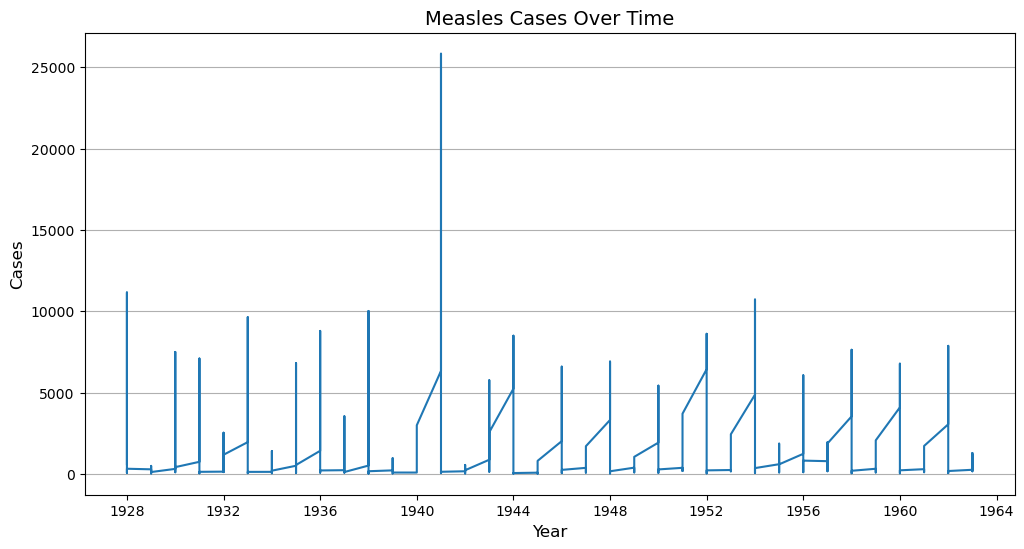

C:\Users\USER\AppData\Local\Temp\ipykernel_19368\85651404.py:24: RuntimeWarning: divide by zero encountered in divide
  period_measles = 1/f_measles


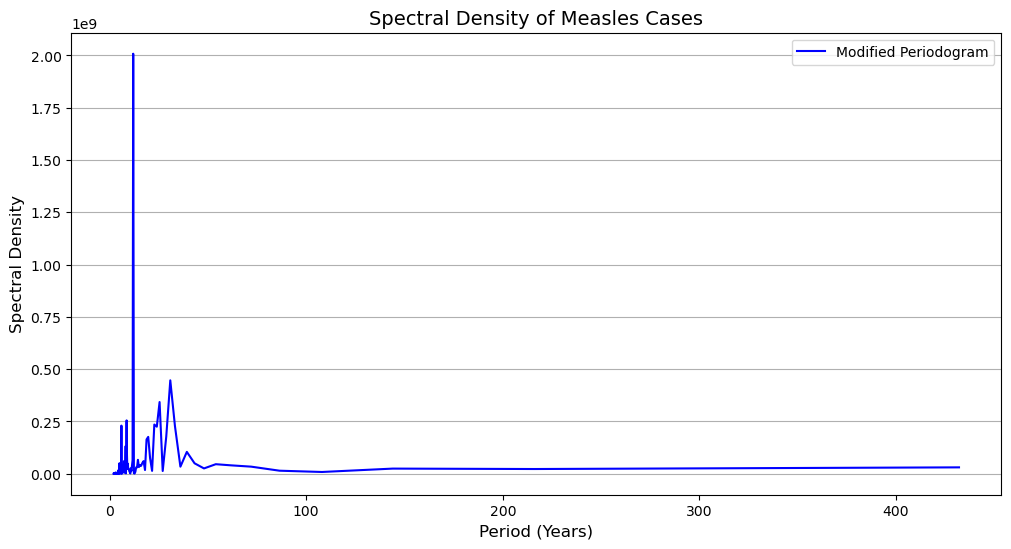

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Read the data: Replace with appropriate paths if not using URLs
# Use the updated sep argument instead of the deprecated delim_whitespace
measure_df = pd.read_csv("https://web.stanford.edu/class/earthsys214/data/nycmeas.dat.txt", header=None, names=["Date", "Cases"], sep='\s+')
dengue_df = pd.read_csv("https://web.stanford.edu/class/earthsys214/data/San_Juan_Training_Data.csv")

# Measles data: Handling the Date column (converting to years) and visualization
measure_df['Date'] = pd.to_datetime(measure_df['Date'].astype(int).astype(str), format='%Y') 
plt.figure(figsize=(12, 6))
plt.plot(measure_df['Date'], measure_df['Cases'])
plt.xlabel("Year", fontsize=12)  # Change to Year
plt.ylabel("Cases", fontsize=12)
plt.title("Measles Cases Over Time", fontsize=14)
plt.grid(axis='y')
plt.show()

# Spectral Density for Measles (modified periodogram)
f_measles, Pxx_measles = periodogram(measure_df['Cases'], fs=1)  # Assuming yearly data 
delta = 1/2
period_measles = 1/f_measles
plt.figure(figsize=(12, 6))
plt.plot(period_measles[1:], 2 * Pxx_measles[1:], 'b-', label='Modified Periodogram') 
plt.xlabel("Period (Years)", fontsize=12)
plt.ylabel("Spectral Density", fontsize=12)
plt.title("Spectral Density of Measles Cases", fontsize=14)
plt.grid(axis='y')
plt.legend()
plt.show()

Index(['season', 'season_week', 'week_start_date', 'denv1_cases',
       'denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases',
       'additional_cases', 'total_cases'],
      dtype='object')


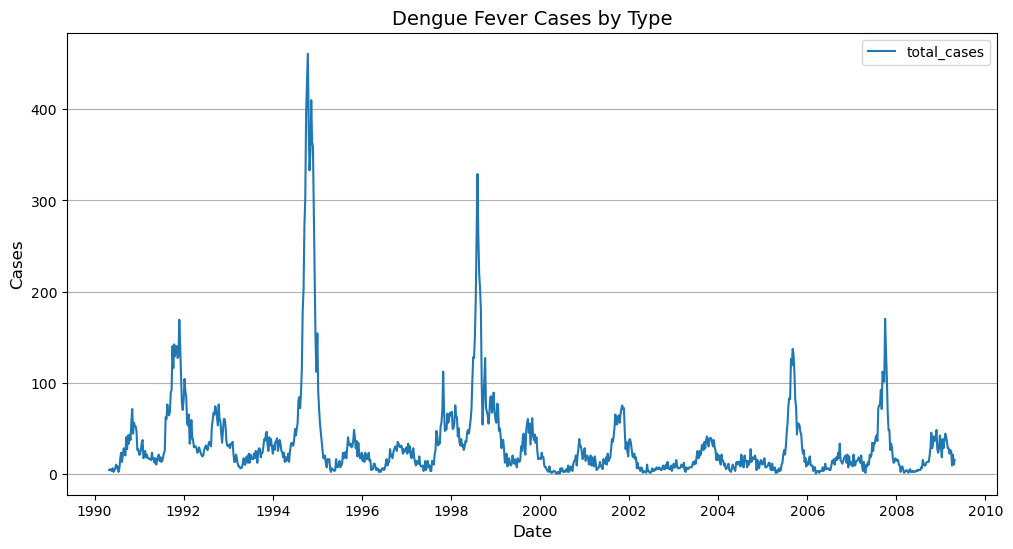

In [8]:

# Dengue Fever data: Time series visualization
dengue_df['week_start_date'] = pd.to_datetime(dengue_df['week_start_date'])
plt.figure(figsize=(12, 6))
# Adjust column names based on the output of the print statement above
for dengue_type in ['total_cases']:
    plt.plot(dengue_df['week_start_date'], dengue_df[dengue_type], label=dengue_type)  
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cases", fontsize=12)
plt.title("Dengue Fever Cases by Type", fontsize=14)
plt.grid(axis='y')
plt.legend()
plt.show()

# ... (rest of your code)


# ... (rest of your code)


In [ ]:
# Spectral Density for Dengue Fever (modified periodogram)
f_dengue, Pxx_dengue = periodogram(dengue_df['total_cases'], fs=1/7)  # Assuming weekly data
delta = 7/365
period_dengue = 1/f_dengue
plt.figure(figsize=(12, 6))
plt.plot(period_dengue[1:101], 2 * Pxx_dengue[1:101], 'r-', label='Modified Periodogram')
plt.xlabel("Period (Years)", fontsize=12)
plt.ylabel("Spectral Density", fontsize=12)
plt.title("Spectral Density of Total Dengue Cases", fontsize=14)
plt.grid(axis='y')
plt.legend()
plt.show()
